In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Sem 7/combined_output.csv')
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [4]:
df = df.drop(columns=['sumber', 'tanggal', 'kategori', 'link', 'jumlahkata'])


In [5]:
df.head()

,judul,isi
0,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon..."
1,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta..."
2,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ..."
3,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...
4,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada..."


In [6]:
def lowercase(review_text):
    if isinstance(review_text, str):
        return review_text.lower()
    else:
        return review_text  # Return the original value if it's not a string

# Apply the lowercase function to both columns
df['isi'] = df['isi'].apply(lowercase)
df['judul'] = df['judul'].apply(lowercase)


In [7]:
import re

def remove_extra_whitespaces(review_text):
    if isinstance(review_text, str):  # Check if it's a string
        return re.sub(r'\s+', ' ', review_text)
    else:
        return review_text  # Return the original value if it's not a string

# Apply the function to both columns
df['isi'] = df['isi'].apply(remove_extra_whitespaces)
df['judul'] = df['judul'].apply(remove_extra_whitespaces)


In [8]:
def remove_special_characters(text):
    if isinstance(text, str):  # Check if it's a string
        return re.sub(r'[^A-Za-z0-9\s]', '', text)
    else:
        return text  # Return the original value if it's not a string

# Apply the function to both columns
df['isi'] = df['isi'].apply(remove_special_characters)
df['judul'] = df['judul'].apply(remove_special_characters)


In [9]:
df.head(5)

,judul,isi
0,ponsel huawei honor 4c dibanderol rp 22 juta,jakarta kompascom ponsel android huawei honor ...
1,asosiasi rpp ecommerce tidak sesuai hasil diskusi,jakarta kompascom sejak 2013 wacana tentang r...
2,pemesan iphone jadi sabun karyawan pesaing lazada,jakarta kompascom danis darusman pelanggan laz...
3,autofeather failure momok bagi pesawat balingb...,kompascom salah satu momok yang dihadapi dalam...
4,laptop bezel tertipis di dunia masuk indonesia,jakarta kompascom resmi diperkenalkan pada aj...


In [10]:
df['judul']=df['judul'].apply(lambda x : 'sostok ' + str(x) + ' eostok')

In [11]:
df.head()

,judul,isi
0,sostok ponsel huawei honor 4c dibanderol rp 22...,jakarta kompascom ponsel android huawei honor ...
1,sostok asosiasi rpp ecommerce tidak sesuai has...,jakarta kompascom sejak 2013 wacana tentang r...
2,sostok pemesan iphone jadi sabun karyawan pesa...,jakarta kompascom danis darusman pelanggan laz...
3,sostok autofeather failure momok bagi pesawat ...,kompascom salah satu momok yang dihadapi dalam...
4,sostok laptop bezel tertipis di dunia masuk in...,jakarta kompascom resmi diperkenalkan pada aj...


In [12]:
df['word_count_text']=df['isi'].apply(lambda x: len(str(x).split()))
for i in range(0, 100, 10):
    var = df['word_count_text'].values
    var = np.sort(var, axis=None)
    print("{} percentile value is {}".format(i, var[int(len(var) * (float(i) / 100))]))

print("100 percentile value is", var[-1])


0 percentile value is 1
10 percentile value is 36
20 percentile value is 122
30 percentile value is 150
40 percentile value is 170
50 percentile value is 188
60 percentile value is 208
70 percentile value is 232
80 percentile value is 263
90 percentile value is 315
100 percentile value is 1923


In [13]:
for i in range(90, 100):
    var = df['word_count_text'].values
    var = np.sort(var, axis=None)
    print("{} percentile value is {}".format(i, var[int(len(var) * (float(i) / 100))]))

print("100 percentile value is", var[-1])


90 percentile value is 315
91 percentile value is 322
92 percentile value is 331
93 percentile value is 341
94 percentile value is 352
95 percentile value is 365
96 percentile value is 382
97 percentile value is 408
98 percentile value is 447
99 percentile value is 525
100 percentile value is 1923


In [14]:
max_len_text=365
max_len_title=15

In [15]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(df["isi"]),
    np.array(df["judul"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [16]:
# Tokenize the text to get the vocab count
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

In [17]:
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1

print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  79.42680374852151


In [18]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt)
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr)
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_len_text, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_len_text, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 33919


In [19]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1

print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr)
y_val_seq = y_tokenizer.texts_to_sequences(y_val)

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_len_title, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_len_title, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 72.31030208129445
Size of vocabulary in Y = 4245


In [33]:
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, TimeDistributed
from tensorflow.keras.models import Model

latent_dim = 300  # Size of the RNN layer
embedding_dim = 200  # Size of the embedding layer

# Encoder
encoder_inputs = Input(shape=(max_len_text,))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)

# Encoder SimpleRNN 1
encoder_rnn1 = SimpleRNN(latent_dim, return_sequences=True, return_state=True, dropout=0.4)
encoder_output1, state_h1 = encoder_rnn1(enc_emb)

# Encoder SimpleRNN 2
encoder_rnn2 = SimpleRNN(latent_dim, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2 = encoder_rnn2(encoder_output1)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None,))

# Embedding layer for the decoder
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder SimpleRNN
decoder_rnn = SimpleRNN(latent_dim, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, decoder_state = decoder_rnn(dec_emb, initial_state=[state_h2])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 365)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 365, 200)       │      6,783,800 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_9             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_8 (SimpleRNN)  │ [(None, 365, 300),     │        150,300 │ embedding_6[0][0]      │
│                           │ (None, 300)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, None, 200)      │        849,000 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_9 (SimpleRNN)  │ [(None, 365, 300),     │        180,300 │ simple_rnn_8[0][0]     │
│                           │ (None, 300)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_10 (SimpleRNN) │ [(None, None, 300),    │        150,300 │ embedding_7[0][0],     │
│                           │ (None, 300)]           │                │ simple_rnn_9[0][1]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_2        │ (None, None, 4245)     │      1,277,745 │ simple_rnn_10[0][0]    │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,391,445 (35.83 MB)

 Trainable params: 9,391,445 (35.83 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr[:, 1:],
    epochs=5,
    callbacks=[early_stopping],
    batch_size=128,
    validation_data=([x_val, y_val[:, :-1]], y_val[:, 1:])
    )


Epoch 1/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 59s 210ms/step - accuracy: 0.6224 - loss: 3.5781 - val_accuracy: 0.6910 - val_loss: 2.3829
Epoch 2/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 55s 130ms/step - accuracy: 0.6912 - loss: 2.3642 - val_accuracy: 0.6934 - val_loss: 2.3196
Epoch 3/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 39s 123ms/step - accuracy: 0.6923 - loss: 2.2953 - val_accuracy: 0.6971 - val_loss: 2.2360
Epoch 4/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 123ms/step - accuracy: 0.7004 - loss: 2.1553 - val_accuracy: 0.7005 - val_loss: 2.1722
Epoch 5/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 123ms/step - accuracy: 0.7057 - loss: 2.0589 - val_accuracy: 0.7048 - val_loss: 2.1181


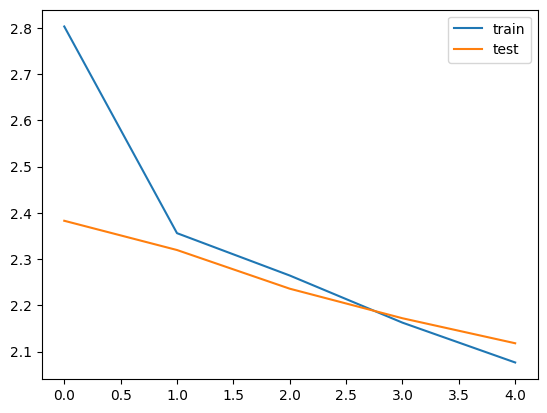

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [36]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [49]:
# Define start and end tokens using sostok and eostok
start_token = x_tokenizer.word_index.get('sostok', 1)
end_token = x_tokenizer.word_index.get('eostok', 0)

# Prepare encoder input by tokenizing and padding
encoder_input = x_tokenizer.texts_to_sequences(df['isi'])
encoder_input = pad_sequences(encoder_input, maxlen=max_len_text)

summaries = []

# Function for sampling with a temperature parameter
def sample_with_temperature(predictions, temperature=0.8):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-7) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(predictions), p=predictions)

for i in range(10):
    decoder_input = np.array([[start_token]])
    generated_tokens = []

    for _ in range(max_len_title):
        predictions = model.predict([encoder_input[i:i+1], decoder_input])

        # Use sampling to add variability and avoid repetition
        predicted_token = sample_with_temperature(predictions[0, -1, :])

        if predicted_token == end_token:
            break

        generated_tokens.append(predicted_token)
        decoder_input = np.array([[predicted_token]])

    # Decode generated tokens to readable text
    generated_summary = ' '.join([reverse_source_word_index.get(token, '') for token in generated_tokens])
    summaries.append(generated_summary)

# Display results
result_df = pd.DataFrame({
    'judul': df['judul'][:10],
    'generated_summary': summaries
})

print(result_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [50]:
for i, (judul, summary) in enumerate(zip(df['judul'][:10], summaries), 1):
    print(f"\nArticle {i}:")
    print(f"Title: {judul}")
    print(f"Generated Summary: {summary}\n")


Article 1:
Title: sostok ponsel huawei honor 4c dibanderol rp 22 juta eostok
Generated Summary: tampil industri sulit lepas menyusun gaji kupang wib rentang draf evaluasi penalti puncak menjelaskan tampil


Article 2:
Title: sostok asosiasi rpp ecommerce tidak sesuai hasil diskusi eostok
Generated Summary: dan di


Article 3:
Title: sostok pemesan iphone jadi sabun karyawan pesaing lazada eostok
Generated Summary: pertumbuhan tendangan denda oppo utang asean puncak barcelona sebaiknya hasan hotspur bin hampir ali gaya


Article 4:
Title: sostok autofeather failure momok bagi pesawat balingbaling eostok
Generated Summary: kejadian syamsuddin pasar samasama rekonsiliasi pemenang batam dikeluarkan market enggak diy 2011 pisang roti imigrasi


Article 5:
Title: sostok laptop bezel tertipis di dunia masuk indonesia eostok
Generated Summary: dan di


Article 6:
Title: sostok ok google bakal bisa diakses tanpa internet eostok
Generated Summary: dilansir 41 minta khususnya fadli diperlukan me

### []


In [38]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[state_h1])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2 = decoder_rnn(dec_emb2, initial_state=[decoder_state_input_h])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs, decoder_state_input_h],
    [decoder_outputs2, state_h2]
)

In [42]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # Predict the next token in the sequence.
        output_tokens, h = decoder_model.predict([target_seq] + [e_out, e_h])

        # Get the token with the highest probability.
        sampled_token_index = np.argmax(output_tokens[0, -1, :])

        # Check if the token is valid (i.e., not a padding or unknown token).
        if sampled_token_index == 0:
            # Skip token '0' as it may correspond to padding.
            continue

        # Map the token index to the corresponding word.
        sampled_token = reverse_target_word_index.get(sampled_token_index, None)

        if sampled_token is None:
            # If no token found, stop.
            break

        # Append the decoded token to the sentence if it's not 'eostok'.
        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) >= (max_len_title - 1):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states for the next prediction.
        e_h = h

    return decoded_sentence


In [43]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [44]:
for i in range(0, 10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_len_text)))
    print("\n")

Review: vivacoid manajemen real madrid dibuat pusing pada bursa transfer musim panas ini pasalnya sederetan pemain madrid kini tengah menjadi incaran klub saja beberapa punggawa lini tengah los blancos kabarnya ada empat gelandang madrid yang terus didekati klub eropa toni kroos tribal football melaporkan pemain asal jerman itu saat ini dikaitkan dengan liverpool dan juga paris ada isco gelandang asli spanyol itu tengah didekati oleh raksasa premier league manchester city sport mengatakan bos mancity txiki sudah berkomunikasi secara personal dengan isco asier illarramendi juga disebutsebut punya peluang untuk pindah eks pemain real sociedad itu kabarnya dilirik oleh liverpool bahkan illarramendi tinggal selangkah lagi pindah ke gelandang madrid yang dilirik klub lain adalah lucas silva pemain satu ini memang sudah dipastikan bakal dilepas oleh madrid klub serie a fiorentina disebut sebagai pelabuhan lucas silva selanjutnya 
Original summary: deretan gelandang madrid masuk radar klub la

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define start and end tokens using sostok and eostok
start_token = x_tokenizer.word_index.get('sostok', 1)
end_token = x_tokenizer.word_index.get('eostok', 0)

# Prepare encoder input by tokenizing and padding
encoder_input = x_tokenizer.texts_to_sequences(df['isi'])
encoder_input = pad_sequences(encoder_input, maxlen=max_len_text)

summaries = []

# Function for sampling with a temperature parameter
def sample_with_temperature(predictions, temperature=0.8):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-7) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(predictions), p=predictions)

for i in range(10):
    decoder_input = np.array([[start_token]])
    generated_tokens = []

    for _ in range(max_len_title):
        predictions = model.predict([encoder_input[i:i+1], decoder_input])

        # Use sampling to add variability and avoid repetition
        predicted_token = sample_with_temperature(predictions[0, -1, :])

        if predicted_token == end_token:
            break

        generated_tokens.append(predicted_token)
        decoder_input = np.array([[predicted_token]])

    # Decode generated tokens to readable text
    generated_summary = ' '.join([x_tokenizer.index_word.get(token, '') for token in generated_tokens])
    summaries.append(generated_summary)

# Display results
result_df = pd.DataFrame({
    'judul': df['judul'][:10],
    'generated_summary': summaries
})

print(result_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━

In [ ]:
for i, (judul, summary) in enumerate(zip(df['judul'][:10], summaries), 1):
    print(f"\nArticle {i}:")
    print(f"judul: {judul}")
    print(f"Generated Summary: {summary}\n")



Article 1:
judul: sostok ponsel huawei honor 4c dibanderol rp 22 juta eostok
Generated Summary: dari keseluruhan juli tiba para hal masalah sumbar mempertahankan waktunya dengan jayapura pemuda dimana tindakan


Article 2:
judul: sostok asosiasi rpp ecommerce tidak sesuai hasil diskusi eostok
Generated Summary: dan di


Article 3:
judul: sostok pemesan iphone jadi sabun karyawan pesaing lazada eostok
Generated Summary: dengan kepolisian pun bila tersebut khususnya dinas setempat dapat cipali lewat hal surya media partai


Article 4:
judul: sostok autofeather failure momok bagi pesawat balingbaling eostok
Generated Summary: tinggi dengan di


Article 5:
judul: sostok laptop bezel tertipis di dunia masuk indonesia eostok
Generated Summary: akan di


Article 6:
judul: sostok ok google bakal bisa diakses tanpa internet eostok
Generated Summary: mengandung pondok sisi ujarnya kelurahan mempersiapkan terus indonesia koordinasi penyidik dalam widodo pemudik dan di


Article 7:
judul: sostok 